## JWST F1000W Stephan's Quintet ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 3 Aug 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [45]:
filter = "F1000W"
fwhm = 2.9
basename = "jw0273200"

crval = [338.9982251241355, 33.95839892526284]
# rotation = 63.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [-0.11869972000626429, -0.13548076355522468]
tile2_shifts = [0.1810914151833745, -0.11778119088380427]
tile3_shifts = [0.24783992350343395, -0.02284685457243522]
tile4_shifts = [-0.07174097028261477, -0.12693356035231074]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = True

# display range for uncalibrated images
drange_raw = [35., 60.]
# display range for calibrated images
drange_cal = [15., 30.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1000W/stage0/jw02732006001_02103_00003_mirimage_uncal.fits', './F1000W/stage0/jw02732006001_02103_00007_mirimage_uncal.fits', './F1000W/stage0/jw02732006001_02103_00006_mirimage_uncal.fits', './F1000W/stage0/jw02732006002_02103_00002_mirimage_uncal.fits', './F1000W/stage0/jw02732006001_02103_00002_mirimage_uncal.fits', './F1000W/stage0/jw02732002002_02103_00005_mirimage_uncal.fits', './F1000W/stage0/jw02732002002_02103_00003_mirimage_uncal.fits', './F1000W/stage0/jw02732002002_02103_00001_mirimage_uncal.fits', './F1000W/stage0/jw02732006002_02103_00007_mirimage_uncal.fits', './F1000W/stage0/jw02732002001_02103_00007_mirimage_uncal.fits', './F1000W/stage0/jw02732002001_02103_00006_mirimage_uncal.fits', './F1000W/stage0/jw02732002002_02103_00004_mirimage_uncal.fits', './F1000W/stage0/jw02732006001_02103_00001_mirimage_uncal.fits', './F1000W/stage0/jw02732002001_02103_00003_mirimage_uncal.fits', './F1000W/stage0/jw02732006001_02103_00004_mirimage_uncal.fits', './F1000W/stage0/jw02732

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-08-03 14:08:45,943 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-03 14:08:45,944 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-03 14:08:45,944 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-03 14:08:45,945 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-03 14:08:45,945 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-03 14:08:45,946 - stpipe 

./F1000W/stage0/jw02732006001_02103_00003_mirimage_uncal.fits


2022-08-03 14:08:46,052 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1000W/stage0/jw02732006001_02103_00003_mirimage_uncal.fits',).
2022-08-03 14:08:46,061 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1000W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-08-03 14:08:52,756 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-08-03 14:08:52,756 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-08-03 14:08:52,758 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-08-03 14:08:52,860 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00003_mirimage_uncal.fits>,).
2022-08-03 14:08:52,861 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:08:52,880 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-08-03 14:09:56,217 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-08-03 14:09:56,217 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-08-03 14:09:56,217 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-08-03 14:09:56,218 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-08-03 14:09:56,218 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-08-03 14:09:56,218 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-08-03 14:09:56,218 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-08-03 14:09:56,218 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-08-03 14:09:56,219 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-08-03 14:09:56,844 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-08-03 14:09:59,309 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5008 pixels with at least one CR from five groups.
2022-08-03 14:09:59,310 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:09:59,311 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:09:59,328 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:09:59,340 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4694 pixels with at least one CR from five groups.
2022-08-03 14:09:59,341 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:09:5

2022-08-03 14:10:25,212 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-03 14:10:25,213 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-03 14:10:25,214 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-03 14:10:25,214 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-03 14:10:25,215 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1000W/stage0/jw02732006001_02103_00007_mirimage_uncal.fits


2022-08-03 14:10:30,293 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:10:30,310 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:10:30,314 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:10:30,316 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:10:30,317 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:10:36,452 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:10:36,471 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:10:37,230 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:10:37,331 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:10:37,332 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:10:45,130 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:10:45,139 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4736 pixels with at least one CR from five groups.
2022-08-03 14:10:45,141 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:10:45,141 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:10:45,198 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:10:45,209 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 

2022-08-03 14:11:08,836 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:11:08,838 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:11:10,614 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:11:10,616 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:11:10,766 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:11:10,879 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:11:10,881 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:11:12,107 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:11:12,108 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:11:12,109 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:11:12,110 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006001_02103_00006_mirimage_uncal.fits


2022-08-03 14:11:14,502 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:11:14,505 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:11:14,506 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:11:14,507 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:11:14,509 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:11:22,134 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:11:22,154 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:11:22,986 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:11:23,192 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:11:23,194 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:11:32,639 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:11:32,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5317 pixels with at least one CR from five groups.
2022-08-03 14:11:32,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:11:32,657 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:11:32,799 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:11:32,811 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4871 pixels with at least one CR from five groups.
2022-08-03 14:11:32,812 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-03 14:12:00,634 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:12:00,636 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:12:01,230 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:12:01,232 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:12:01,366 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:12:01,486 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:12:01,489 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:12:02,720 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:12:02,721 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:12:02,721 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:12:02,722 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006002_02103_00002_mirimage_uncal.fits


2022-08-03 14:12:06,500 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:12:06,507 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:12:06,509 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:12:06,510 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:12:06,511 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:12:14,788 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:12:14,806 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:12:15,742 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:12:15,899 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:12:15,902 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:12:25,682 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:12:25,738 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:12:25,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5055 pixels with at least one CR from five groups.
2022-08-03 14:12:25,748 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:12:25,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:12:25,867 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:12:51,609 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:12:51,609 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:12:51,610 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:12:52,956 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:12:52,957 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:12:53,083 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:12:53,196 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:12:53,209 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:12:54,633 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:12:54,634 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:12:54,635 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:12:54,636 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006001_02103_00002_mirimage_uncal.fits


2022-08-03 14:12:57,369 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:12:57,372 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:12:57,375 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:12:57,379 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:12:57,383 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:13:03,754 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:13:03,788 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:13:04,569 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:13:04,690 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:13:04,691 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:13:12,254 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:13:12,257 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5509 pixels with at least one CR from five groups.
2022-08-03 14:13:12,258 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:13:12,259 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:13:12,377 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:13:12,395 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5116 pixels with at least one CR from five groups.
2022-08-03 14:13:12,397 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-03 14:13:37,067 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:13:37,367 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:13:37,368 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:13:37,721 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:13:37,724 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:13:40,158 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:13:40,160 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:13:41,177 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:13:41,179 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:13:41,330 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14

2022-08-03 14:13:42,626 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 14:13:42,628 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 14:13:42,629 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:13:42,631 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02732002002_02103_00005_mirimage_uncal.fits


2022-08-03 14:13:44,516 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:13:44,521 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:13:44,523 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:13:44,525 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:13:44,527 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:13:51,984 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:13:52,002 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:13:52,860 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:13:53,010 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:13:53,011 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:14:02,017 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:14:02,042 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:14:02,093 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:14:02,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5024 pixels with at least one CR from five groups.
2022-08-03 14:14:02,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-08-03 14:14:02,104 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-08-03 14:14:02,134 - stpipe.Detector1Pipeline.jump - INFO - Working on int

2022-08-03 14:14:27,263 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:14:28,274 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:14:28,276 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:14:29,011 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:14:29,013 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:14:29,159 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:14:29,351 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:14:29,355 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:14:30,493 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:14:30,494 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:14:30,495 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:14:30,497 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002002_02103_00003_mirimage_uncal.fits


2022-08-03 14:14:32,344 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:14:32,352 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:14:32,359 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:14:32,368 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:14:32,374 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:14:39,779 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:14:39,799 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:14:40,658 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:14:40,807 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00003_mirimage_uncal.fits>,).
2022-08-03 14:14:40,808 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:14:49,741 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:14:49,746 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:14:49,824 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:14:49,836 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5815 pixels with at least one CR from five groups.
2022-08-03 14:14:49,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-03 14:14:49,840 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:14:49,869 - stpipe.Detector1Pipeline.jump - INFO - Working on inte

2022-08-03 14:15:14,222 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:15:15,640 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:15:15,643 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:15:17,138 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:15:17,140 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:15:17,457 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:15:17,459 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:15:17,659 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:15:17,829 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00003_mirimage_uncal.fits>,).
2022-08-03 14:15:17,833 - stp

2022-08-03 14:15:19,005 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 14:15:19,005 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:15:19,006 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:15:19,006 - stpipe.Detector1Pipeline

./F1000W/stage0/jw02732002002_02103_00001_mirimage_uncal.fits


2022-08-03 14:15:20,793 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:15:20,797 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:15:20,798 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:15:20,799 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:15:20,801 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:15:28,110 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:15:28,154 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:15:29,004 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:15:29,125 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00001_mirimage_uncal.fits>,).
2022-08-03 14:15:29,127 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:15:38,259 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-03 14:15:38,365 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:15:38,378 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4929 pixels with at least one CR from five groups.
2022-08-03 14:15:38,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-08-03 14:15:38,393 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-03 14:15:38,416 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:15:38,421 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 14:16:00,828 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:16:00,830 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:16:03,023 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:16:03,025 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:16:03,156 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:16:03,282 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00001_mirimage_uncal.fits>,).
2022-08-03 14:16:03,284 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:16:04,774 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:16:04,776 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:16:04,776 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:16:04,777 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006002_02103_00007_mirimage_uncal.fits


2022-08-03 14:16:08,060 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:16:08,063 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:16:08,066 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:16:08,067 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:16:08,067 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:16:14,704 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:16:14,723 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:16:15,558 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:16:15,703 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:16:15,704 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:16:23,633 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:16:23,702 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:16:23,721 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:16:23,733 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4552 pixels with at least one CR from five groups.
2022-08-03 14:16:23,734 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-03 14:16:23,736 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:16:23,802 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 14:16:46,905 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:16:46,908 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:16:47,788 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:16:47,790 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:16:49,434 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:16:49,436 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:16:49,611 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:16:49,773 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:16:49,775 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 14:16:50,823 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:16:50,824 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:16:50,824 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:16:50,825 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002001_02103_00007_mirimage_uncal.fits


2022-08-03 14:16:52,715 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:16:52,719 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:16:52,721 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:16:52,721 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:16:52,723 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:17:00,311 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:17:00,330 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:17:01,213 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:17:01,396 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:17:01,398 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:17:10,489 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-03 14:17:10,491 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:17:10,549 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:17:10,558 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4930 pixels with at least one CR from five groups.
2022-08-03 14:17:10,559 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:17:10,560 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:17:10,

2022-08-03 14:17:33,740 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:17:36,032 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:17:36,034 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:17:36,286 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:17:36,288 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:17:38,089 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:17:38,091 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:17:38,229 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:17:38,364 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:17:38,367 - stp

2022-08-03 14:17:39,369 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 14:17:39,369 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:17:39,370 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:17:39,370 - stpipe.Detector1Pipeline

./F1000W/stage0/jw02732002001_02103_00006_mirimage_uncal.fits


2022-08-03 14:17:41,261 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:17:41,265 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:17:41,266 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:17:41,267 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:17:41,267 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:17:49,607 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:17:49,627 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:17:50,555 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:17:50,724 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:17:50,725 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:18:00,113 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:18:00,124 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4990 pixels with at least one CR from five groups.
2022-08-03 14:18:00,125 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:18:00,126 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:18:00,173 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:18:00,441 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:18:00,450 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-08-03 14:18:24,793 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:18:24,795 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:18:25,545 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:18:25,547 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:18:25,675 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:18:25,799 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:18:25,802 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:18:27,254 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:18:27,255 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:18:27,255 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:18:27,256 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002002_02103_00004_mirimage_uncal.fits


2022-08-03 14:18:31,712 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:18:31,716 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:18:31,718 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:18:31,720 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:18:31,723 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:18:38,208 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:18:38,230 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:18:38,952 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:18:39,090 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:18:39,091 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:18:46,766 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:18:46,755 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:18:46,764 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5179 pixels with at least one CR from five groups.
2022-08-03 14:18:46,765 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:18:46,830 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:18:46,946 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:19:12,992 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:19:14,459 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:19:14,461 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:19:14,671 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:19:14,845 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:19:14,849 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:19:14,911 - stpipe.Detector1Pipeline.ga

2022-08-03 14:19:16,024 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:19:16,025 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:19:16,027 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1000W/stage0/jw02732006001_02103_00001_mirimage_uncal.fits


2022-08-03 14:19:17,868 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:19:17,871 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:19:17,872 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:19:17,873 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:19:17,874 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:19:25,479 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:19:25,500 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:19:26,323 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:19:26,508 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00001_mirimage_uncal.fits>,).
2022-08-03 14:19:26,509 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:19:35,705 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5038 pixels with at least one CR from five groups.
2022-08-03 14:19:35,707 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:19:35,708 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:19:35,716 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:19:35,725 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4823 pixels with at least one CR from five groups.
2022-08-03 14:19:35,726 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:19:3

2022-08-03 14:20:01,214 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:20:01,216 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:20:01,374 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:20:01,376 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:20:03,611 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:20:03,614 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:20:06,024 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:20:06,026 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:20:06,163 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:20:06,300 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 14:20:07,447 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 14:20:07,447 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 14:20:07,448 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:20:07,449 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02732002001_02103_00003_mirimage_uncal.fits


2022-08-03 14:20:07,620 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1000W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-08-03 14:20:10,271 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-08-03 14:20:10,272 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-08-03 14:20:10,275 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-08-03 14:20:10,457 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00003_mirimage_uncal.fits>,).
2022-08-03 14:20:10,458 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:20:10,494 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-08-03 14:20:24,336 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-08-03 14:20:24,337 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-08-03 14:20:24,337 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-08-03 14:20:24,337 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-08-03 14:20:24,338 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-08-03 14:20:24,338 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-08-03 14:20:24,338 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-08-03 14:20:24,338 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-08-03 14:20:24,339 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-08-03 14:20:25,245 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-08-03 14:20:28,479 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:20:28,491 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5235 pixels with at least one CR from five groups.
2022-08-03 14:20:28,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:20:28,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:20:28,617 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:20:28,629 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 

2022-08-03 14:20:59,486 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-03 14:20:59,487 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-08-03 14:20:59,487 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-08-03 14:20:59,488 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_ipc': None, 'class': ''}


2022-08-03 14:20:59,488 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance 

./F1000W/stage0/jw02732006001_02103_00004_mirimage_uncal.fits


2022-08-03 14:21:01,295 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:21:01,298 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:21:01,299 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:21:01,300 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:21:01,301 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:21:09,014 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:21:09,033 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:21:09,944 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:21:10,094 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:21:10,096 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:21:18,050 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4917 pixels with at least one CR from five groups.
2022-08-03 14:21:18,051 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-03 14:21:18,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:21:18,073 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:21:18,161 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:21:18,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4709 pixels with at least one CR from five groups.
2022-08-03 14:21:18,170 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-03 14:21:41,832 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:21:42,317 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:21:42,319 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:21:42,458 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:21:42,598 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:21:42,600 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:21:42,637 - stpipe.Detector1Pipeline.ga

2022-08-03 14:21:43,589 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:21:43,589 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:21:43,590 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1000W/stage0/jw02732006002_02103_00003_mirimage_uncal.fits


2022-08-03 14:21:45,637 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:21:45,640 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:21:45,641 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:21:45,642 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:21:45,643 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:21:51,915 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:21:51,936 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:21:52,646 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:21:52,789 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00003_mirimage_uncal.fits>,).
2022-08-03 14:21:52,790 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:22:00,335 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:22:00,412 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:22:00,421 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4926 pixels with at least one CR from five groups.
2022-08-03 14:22:00,423 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:22:00,424 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-03 14:22:00,499 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:22:22,323 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:22:24,049 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:22:24,051 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:22:24,621 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:22:24,623 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:22:24,774 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:22:24,907 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00003_mirimage_uncal.fits>,).
2022-08-03 14:22:24,911 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:22:26,070 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:22:26,071 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:22:26,072 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:22:26,073 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006002_02103_00006_mirimage_uncal.fits


2022-08-03 14:22:28,343 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:22:28,346 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:22:28,348 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:22:28,348 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:22:28,349 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:22:34,818 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:22:34,837 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:22:35,541 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:22:35,684 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:22:35,685 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:22:43,158 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:22:43,159 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:22:43,236 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:22:43,245 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4876 pixels with at least one CR from five groups.
2022-08-03 14:22:43,246 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:22:43,247 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:22:43,

2022-08-03 14:23:05,081 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:23:05,339 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:23:05,341 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:23:06,673 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:23:06,675 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:23:06,725 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:23:06,727 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:23:06,884 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:23:07,009 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:23:07,013 - stp

2022-08-03 14:23:07,990 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 14:23:07,991 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:23:07,991 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:23:07,992 - stpipe.Detector1Pipeline

./F1000W/stage0/jw02732002001_02103_00002_mirimage_uncal.fits


2022-08-03 14:23:09,753 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:23:09,756 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:23:09,757 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:23:09,758 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:23:09,759 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:23:16,078 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:23:16,097 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:23:16,793 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:23:16,935 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:23:16,936 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:23:24,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:23:24,502 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:23:24,540 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:23:24,549 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4495 pixels with at least one CR from five groups.
2022-08-03 14:23:24,550 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:23:24,551 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:23:24,625 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 14:23:46,695 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:23:46,698 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:23:46,948 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:23:46,950 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:23:47,098 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:23:47,224 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:23:47,228 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:23:48,210 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:23:48,211 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:23:48,211 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:23:48,212 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006001_02103_00008_mirimage_uncal.fits


2022-08-03 14:23:51,196 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:23:51,199 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:23:51,201 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:23:51,202 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:23:51,203 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:23:57,545 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:23:57,565 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:23:58,281 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:23:58,434 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:23:58,435 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:24:06,046 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:24:06,103 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:24:06,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4494 pixels with at least one CR from five groups.
2022-08-03 14:24:06,113 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:24:06,114 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:24:06,190 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:24:27,117 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:24:29,200 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:24:29,202 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:24:30,237 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:24:30,239 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:24:30,385 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:24:30,525 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:24:30,527 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:24:31,524 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:24:31,525 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:24:31,525 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:24:31,526 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002002_02103_00002_mirimage_uncal.fits


2022-08-03 14:24:33,269 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:24:33,273 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:24:33,274 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:24:33,275 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:24:33,276 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:24:39,675 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:24:39,695 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:24:40,426 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:24:40,575 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:24:40,576 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:24:48,240 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:24:48,272 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:24:48,280 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4544 pixels with at least one CR from five groups.
2022-08-03 14:24:48,282 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 14:24:48,283 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:24:48,346 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:25:11,544 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:25:11,551 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:25:11,553 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:25:12,180 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:25:12,182 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:25:12,334 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:25:12,462 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00002_mirimage_uncal.fits>,).
2022-08-03 14:25:12,465 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:25:13,431 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:25:13,432 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:25:13,432 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:25:13,433 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002001_02103_00004_mirimage_uncal.fits


2022-08-03 14:25:15,180 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:25:15,184 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:25:15,185 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:25:15,186 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:25:15,187 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:25:21,640 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:25:21,660 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:25:22,360 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:25:22,507 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:25:22,508 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:25:30,158 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:25:30,159 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:25:30,240 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:25:30,249 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5667 pixels with at least one CR from five groups.
2022-08-03 14:25:30,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:25:30,251 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:25:30,349 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 14:25:52,392 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:25:52,394 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:25:53,853 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:25:53,854 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:25:54,003 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:25:54,135 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:25:54,136 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:25:55,095 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:25:55,096 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:25:55,096 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:25:55,097 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002001_02103_00001_mirimage_uncal.fits


2022-08-03 14:25:56,844 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:25:56,847 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:25:56,849 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:25:56,850 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:25:56,851 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:26:03,350 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:26:03,369 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:26:04,100 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:26:04,248 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00001_mirimage_uncal.fits>,).
2022-08-03 14:26:04,249 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:26:11,938 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:26:11,959 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:26:12,052 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:26:12,061 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4813 pixels with at least one CR from five groups.
2022-08-03 14:26:12,062 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:26:12,063 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:26:12,075 - stpipe.Detector1Pipeline.jump - INFO - Working on inte

2022-08-03 14:26:33,496 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:26:33,498 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:26:34,791 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:26:34,793 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:26:36,047 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:26:36,049 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:26:36,096 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:26:36,098 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:26:36,261 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:26:36,400 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 14:26:37,382 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 14:26:37,383 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 14:26:37,383 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:26:37,384 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02732002002_02103_00007_mirimage_uncal.fits


2022-08-03 14:26:39,149 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:26:39,152 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:26:39,154 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:26:39,155 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:26:39,156 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:26:45,560 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:26:45,579 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:26:46,288 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:26:46,437 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:26:46,438 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:26:54,253 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:26:54,261 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4625 pixels with at least one CR from five groups.
2022-08-03 14:26:54,262 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:26:54,263 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:26:54,325 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:26:54,399 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:27:18,122 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:27:19,485 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:27:19,487 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:27:19,635 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:27:19,764 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00007_mirimage_uncal.fits>,).
2022-08-03 14:27:19,766 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:27:19,805 - stpipe.Detector1Pipeline.ga

2022-08-03 14:27:20,726 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:27:20,726 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:27:20,727 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1000W/stage0/jw02732002001_02103_00008_mirimage_uncal.fits


2022-08-03 14:27:22,482 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:27:22,485 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:27:22,486 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:27:22,487 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:27:22,489 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:27:28,935 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:27:28,954 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:27:29,671 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:27:29,826 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:27:29,827 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:27:37,513 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:27:37,522 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5388 pixels with at least one CR from five groups.
2022-08-03 14:27:37,523 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:27:37,524 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:27:37,532 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:27:37,570 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:27:58,770 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:27:58,856 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:27:58,858 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:28:01,776 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:28:01,778 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:28:01,941 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:28:02,081 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:28:02,084 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:28:03,139 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:28:03,140 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:28:03,140 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:28:03,141 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006002_02103_00001_mirimage_uncal.fits


2022-08-03 14:28:04,959 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:28:04,962 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:28:04,964 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:28:04,965 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:28:04,966 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:28:11,561 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:28:11,581 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:28:12,293 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:28:12,445 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00001_mirimage_uncal.fits>,).
2022-08-03 14:28:12,446 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:28:20,110 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:28:20,119 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4802 pixels with at least one CR from five groups.
2022-08-03 14:28:20,120 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-08-03 14:28:20,121 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:28:20,125 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:28:20,184 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:28:42,926 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:28:44,511 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:28:44,513 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:28:44,514 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:28:44,516 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:28:44,675 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:28:44,807 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00001_mirimage_uncal.fits>,).
2022-08-03 14:28:44,809 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:28:45,781 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:28:45,782 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:28:45,782 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:28:45,783 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006002_02103_00004_mirimage_uncal.fits


2022-08-03 14:28:47,567 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:28:47,570 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:28:47,571 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:28:47,572 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:28:47,574 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:28:54,050 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:28:54,070 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:28:54,785 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:28:54,934 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:28:54,935 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:29:02,638 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:29:02,648 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4673 pixels with at least one CR from five groups.
2022-08-03 14:29:02,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:29:02,651 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:29:02,687 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:29:02,813 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:29:24,020 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:29:27,238 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:29:27,238 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:29:27,240 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:29:27,240 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:29:27,405 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:29:27,536 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00004_mirimage_uncal.fits>,).
2022-08-03 14:29:27,544 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:29:28,590 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:29:28,591 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:29:28,592 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:29:28,592 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002001_02103_00005_mirimage_uncal.fits


2022-08-03 14:29:30,361 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:29:30,365 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:29:30,367 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:29:30,368 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:29:30,369 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:29:36,759 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:29:36,778 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:29:37,488 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:29:37,640 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:29:37,641 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:29:45,370 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:29:45,371 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:29:45,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5081 pixels with at least one CR from five groups.
2022-08-03 14:29:45,381 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-03 14:29:45,382 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:29:45,445 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:30:05,869 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:30:07,529 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:30:07,531 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:30:09,555 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:30:09,557 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:30:09,723 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:30:09,860 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:30:09,862 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:30:10,858 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:30:10,858 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:30:10,859 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:30:10,860 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002002_02103_00008_mirimage_uncal.fits


2022-08-03 14:30:12,626 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:30:12,630 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:30:12,631 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:30:12,632 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:30:12,633 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:30:19,236 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:30:19,258 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:30:19,977 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:30:20,136 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:30:20,137 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:30:27,892 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:30:27,927 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:30:27,936 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5418 pixels with at least one CR from five groups.
2022-08-03 14:30:27,937 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:30:27,938 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:30:28,001 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:30:49,374 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:30:51,630 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:30:51,632 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:30:51,793 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:30:51,930 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:30:51,935 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:30:51,971 - stpipe.Detector1Pipeline.ga

2022-08-03 14:30:53,006 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:30:53,007 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:30:53,008 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1000W/stage0/jw02732006002_02103_00008_mirimage_uncal.fits


2022-08-03 14:30:55,829 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:30:55,832 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:30:55,835 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:30:55,836 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:30:55,836 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:31:02,370 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:31:02,392 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:31:03,098 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:31:03,259 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:31:03,260 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:31:11,136 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:31:11,145 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4508 pixels with at least one CR from five groups.
2022-08-03 14:31:11,147 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:31:11,148 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 14:31:11,148 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:31:11,221 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:31:33,124 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:31:34,816 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:31:34,818 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:31:36,358 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:31:36,360 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:31:36,529 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:31:36,673 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00008_mirimage_uncal.fits>,).
2022-08-03 14:31:36,675 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 14:31:37,684 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:31:37,685 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:31:37,685 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:31:37,686 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732006001_02103_00005_mirimage_uncal.fits


2022-08-03 14:31:40,087 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:31:40,090 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:31:40,091 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:31:40,092 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:31:40,094 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:31:46,578 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:31:46,598 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:31:47,312 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:31:47,479 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:31:47,480 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:31:55,161 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:31:55,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4195 pixels with at least one CR from five groups.
2022-08-03 14:31:55,171 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:31:55,172 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:31:55,235 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:31:55,243 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 

2022-08-03 14:32:18,223 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:32:18,226 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:32:18,439 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:32:18,441 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:32:18,608 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:32:18,744 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:32:18,748 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 14:32:19,792 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 14:32:19,793 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:32:19,793 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:32:19,794 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02732002002_02103_00006_mirimage_uncal.fits


2022-08-03 14:32:21,585 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:32:21,588 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:32:21,590 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:32:21,591 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:32:21,592 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:32:28,048 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:32:28,067 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:32:28,769 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:32:28,919 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:32:28,920 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:32:36,571 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:32:36,612 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:32:36,621 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5020 pixels with at least one CR from five groups.
2022-08-03 14:32:36,622 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 14:32:36,624 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 14:32:36,703 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 14:32:59,678 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:33:01,599 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:33:01,601 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:33:01,765 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:33:01,902 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00006_mirimage_uncal.fits>,).
2022-08-03 14:33:01,903 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:33:01,937 - stpipe.Detector1Pipeline.ga

2022-08-03 14:33:02,924 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 14:33:02,924 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 14:33:02,925 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1000W/stage0/jw02732006002_02103_00005_mirimage_uncal.fits


2022-08-03 14:33:05,747 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 14:33:05,750 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 14:33:05,751 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 14:33:05,752 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 14:33:05,754 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 14:33:12,299 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-08-03 14:33:12,318 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 14:33:13,016 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 14:33:13,175 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:33:13,176 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-08-03 14:33:20,802 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 14:33:20,852 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:33:20,945 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 14:33:21,014 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:33:21,015 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 14:33:21,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4568 pixels with at least one CR from five groups.
2022-08-03 14:33:21,024 - stpipe.Detector1Pipeline.jump - INFO - From hi

2022-08-03 14:33:41,847 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:33:43,272 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:33:43,274 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:33:43,811 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:33:43,813 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:33:46,531 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 14:33:46,533 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 14:33:46,702 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 14:33:46,848 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00005_mirimage_uncal.fits>,).
2022-08-03 14:33:46,853 - stp

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [37]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

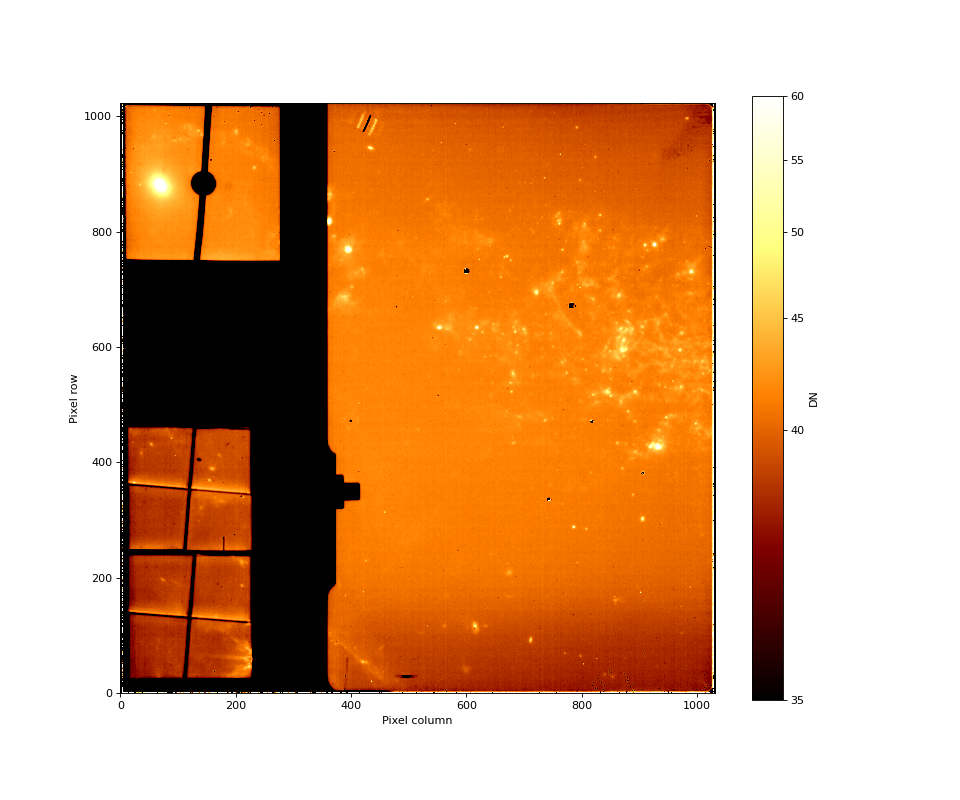

In [38]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

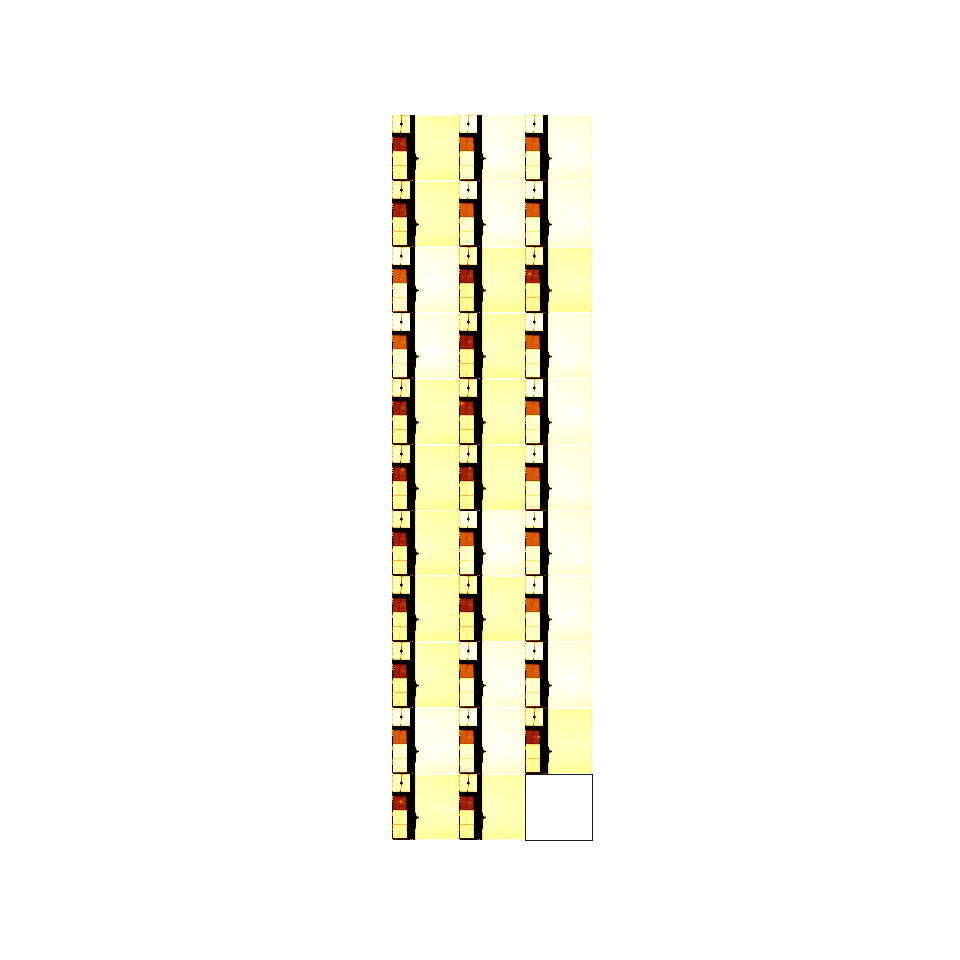

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1000W/stage1/jw02732006002_02103_00003_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002002_02103_00007_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002001_02103_00008_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732006001_02103_00007_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002001_02103_00006_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002001_02103_00004_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002002_02103_00008_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732006001_02103_00002_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732006002_02103_00006_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002002_02103_00006_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732006001_02103_00001_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732002001_02103_00007_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732006002_02103_00004_mirimage_fixed_rate.fits', './F1000W/stage1/jw02732006002_02103_00007_mirimage_fixed_rate.fits', './F1000W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-08-03 14:34:29,685 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-08-03 14:34:29,686 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-08-03 14:34:29,686 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-08-03 14:34:29,687 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-08-03 14:34:31,614 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 14:34:31,615 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-03 14:34:31,616 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-03 14:34:31,616 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-03 14:34:31,616 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-03 14:34:31,616 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 14:34:31,618 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:34:31,619 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-03 14:34:31,645 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 14:34:31,646 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 14:34:31,646 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-03 14:34:31,646 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-03 14:34:31,647 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-03 14:34:31,647 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 14:34:31,647 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 14:34:31,647 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 14:34:31,648 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027320060

2022-08-03 14:34:31,676 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 14:34:31,677 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:34:31,678 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-03 14:34:31,678 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-03 14:34:31,679 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-08-03 14:34:31,680 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 14:34:31,680 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-08-03 14:34:31,705 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 14:34:31,705 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 14:34:31,705 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 14:34:31,706 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02103_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-03 14:34:31,709 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 14:34:31,710 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-08-03 14:34:31,746 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-08-03 14:34:31,747 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 14:34:31,747 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-03 14:34:31,747 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-03 14:34:31,747 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-03 14:34:31,747 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-03 14:34:31,748 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 14:34:31,748 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 14:34:31,748 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-08-03 14:34:31,777 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 14:34:31,778 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-03 14:34:31,778 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-03 14:34:31,779 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-03 14:34:31,779 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-03 14:34:31,779 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 14:34:31,780 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:34:31,780 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-03 14:34:31,806 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 14:34:31,806 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 14:34:31,806 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-03 14:34:31,807 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-03 14:34:31,807 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-03 14:34:31,807 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 14:34:31,807 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 14:34:31,808 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 14:34:31,808 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027320060

2022-08-03 14:34:31,836 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 14:34:31,837 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:34:31,837 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-03 14:34:31,838 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-03 14:34:31,838 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-08-03 14:34:31,839 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 14:34:31,839 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-08-03 14:34:31,864 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 14:34:31,864 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 14:34:31,864 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 14:34:31,865 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02103_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-03 14:34:31,868 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 14:34:31,869 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-08-03 14:34:31,895 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-08-03 14:34:31,896 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 14:34:31,896 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-03 14:34:31,896 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-03 14:34:31,897 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-03 14:34:31,897 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-03 14:34:31,897 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 14:34:31,897 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 14:34:31,897 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-08-03 14:34:31,925 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 14:34:31,926 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-03 14:34:31,926 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-03 14:34:31,926 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-03 14:34:31,926 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-03 14:34:31,926 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 14:34:31,927 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:34:31,928 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-03 14:34:31,955 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 14:34:31,955 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 14:34:31,955 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-03 14:34:31,956 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-03 14:34:31,956 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-03 14:34:31,956 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 14:34:31,957 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 14:34:31,957 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 14:34:31,957 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027320060

2022-08-03 14:34:31,989 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 14:34:31,990 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:34:31,992 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-03 14:34:31,992 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-03 14:34:31,994 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-08-03 14:34:31,994 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 14:34:31,995 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-08-03 14:34:34,549 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 14:34:34,736 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 14:34:35,221 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:34:35,658 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 14:34:36,142 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:34:36,479 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 14:34:36,969 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:34:37,305 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:34:37,784 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:34:38,134 - stpipe.Image2Pipeline.resample 

2022-08-03 14:34:43,199 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:34:43,681 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:34:44,042 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.021654522 33.997974651 338.986833721 33.985633068 339.001864724 33.956480411 339.036675767 33.968817763
2022-08-03 14:34:44,600 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1000W/stage2/jw02732002002_02103_00007_mirimage_fixed_i2d.fits
2022-08-03 14:34:44,600 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 14:34:44,601 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1000W/stage1/jw02732002002_02103_00007_mirimage_fixed
2022-08-03 14:34:44,602 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02732002001_02103_00008_mirimage_fixed
2022-08-03 14:34:44,602 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02

2022-08-03 14:34:50,426 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02732006001_02103_00007_mirimage_fixed
2022-08-03 14:34:50,426 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02732006001_02103_00007_mirimage_fixed_rate.fits ...
2022-08-03 14:34:50,713 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00007_mirimage_fixed_rate.fits>,).
2022-08-03 14:34:50,714 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-08-03 14:34:56,749 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-03 14:34:56,839 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  338.991978910 33.988354138 338.957352308 33.975937603 338.972344137 33.947084555 339.007155870 33.959250908
2022-08-03 14:34:56,840 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.991978910 33.988354138 338.957352308 33.975937603 338.972344137 33.947084555 339.007155870 33.959250908
2022-08-03 14:34:56,840 - stpipe.Image2

2022-08-03 14:35:02,772 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.992924066 33.993650498 338.958295193 33.981234180 338.973287693 33.952381038 339.008101704 33.964547172
2022-08-03 14:35:02,772 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-03 14:35:02,839 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-03 14:35:03,076 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00004_mirimage_fixed_rate.fits>,).
2022-08-03 14:35:03,077 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-03 14:35:09,014 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:35:09,015 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:35:09,015 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:35:09,021 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:35:09,188 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-03 14:35:09,425 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00008_mirimage_fixed_rate.fits>,).
2022-08-03 14:35:09,427 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-03 14:35:15,346 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006001_02103_00002_mirimage_fixed_rate.fits>,).
2022-08-03 14:35:15,347 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-03 14:35:15,369 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-03 14:35:15,370 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 14:35:15,458 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 14:35:15

2022-08-03 14:35:21,293 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 14:35:21,380 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 14:35:21,380 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-03 14:35:21,381 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-03 14:35:21,381 - stpipe.Image2Pipeline.photom - INFO -  filter: F1000W
2022-08-03 14:35:21,422 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-03 14:35:21,424 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-03 14:35:21,425 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 14:35:21,425 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-08-03 14:35:21,441 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 14:35:21,695 - stpipe.Im

2022-08-03 14:35:27,495 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 14:35:27,495 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-08-03 14:35:27,511 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 14:35:27,759 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00006_mirimage_fixed_rate.fits>,).
2022-08-03 14:35:27,761 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-08-03 14:35:33,678 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 14:35:33,820 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 14:35:34,296 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:35:34,630 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 14:35:35,093 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:35:35,431 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 14:35:35,916 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:35:36,254 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:35:36,736 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:35:37,090 - stpipe.Image2Pipeline.resample 

2022-08-03 14:35:42,191 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:35:42,691 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:35:43,043 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  338.993756329 33.988215551 338.958947583 33.975858358 338.973995858 33.946712444 339.008794861 33.959065403
2022-08-03 14:35:43,620 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1000W/stage2/jw02732002001_02103_00007_mirimage_fixed_i2d.fits
2022-08-03 14:35:43,621 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 14:35:43,622 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1000W/stage1/jw02732002001_02103_00007_mirimage_fixed
2022-08-03 14:35:43,623 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02732006002_02103_00004_mirimage_fixed
2022-08-03 14:35:43,623 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02

2022-08-03 14:35:49,670 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02732006002_02103_00007_mirimage_fixed
2022-08-03 14:35:49,671 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02732006002_02103_00007_mirimage_fixed_rate.fits ...
2022-08-03 14:35:49,982 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00007_mirimage_fixed_rate.fits>,).
2022-08-03 14:35:49,983 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-08-03 14:35:56,206 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-03 14:35:56,297 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  339.020825841 34.003409960 338.986184902 33.991009151 339.001160337 33.962149300 339.035986260 33.974299840
2022-08-03 14:35:56,298 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.020825841 34.003409960 338.986184902 33.991009151 339.001160337 33.962149300 339.035986260 33.974299840
2022-08-03 14:35:56,298 - stpipe.Image2

2022-08-03 14:36:02,424 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.009271886 33.981194564 338.978514363 33.963084935 339.000400336 33.937442993 339.031405265 33.955340090
2022-08-03 14:36:02,425 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-03 14:36:02,494 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-03 14:36:02,776 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00002_mirimage_fixed_rate.fits>,).
2022-08-03 14:36:02,777 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-03 14:36:08,954 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:36:08,954 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:36:08,955 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:36:08,960 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:36:09,079 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-03 14:36:09,331 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00008_mirimage_fixed_rate.fits>,).
2022-08-03 14:36:09,332 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-03 14:36:15,273 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00001_mirimage_fixed_rate.fits>,).
2022-08-03 14:36:15,274 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-03 14:36:15,296 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-03 14:36:15,297 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 14:36:15,386 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 14:36:15

2022-08-03 14:36:21,165 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 14:36:21,255 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 14:36:21,256 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-03 14:36:21,256 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-03 14:36:21,256 - stpipe.Image2Pipeline.photom - INFO -  filter: F1000W
2022-08-03 14:36:21,297 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-03 14:36:21,299 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-03 14:36:21,299 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 14:36:21,300 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-08-03 14:36:21,316 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 14:36:21,580 - stpipe.Im

2022-08-03 14:36:27,274 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 14:36:27,275 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-08-03 14:36:27,292 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 14:36:27,565 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00001_mirimage_fixed_rate.fits>,).
2022-08-03 14:36:27,567 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-08-03 14:36:33,733 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 14:36:33,886 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 14:36:34,359 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:36:34,691 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 14:36:35,170 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:36:35,506 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 14:36:35,990 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:36:36,321 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:36:36,806 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:36:37,156 - stpipe.Image2Pipeline.resample 

2022-08-03 14:36:42,266 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:36:42,741 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:36:43,091 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.021510047 33.965039719 338.990554799 33.946969171 339.012550015 33.921041644 339.043500502 33.939106688
2022-08-03 14:36:43,691 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1000W/stage2/jw02732006001_02103_00006_mirimage_fixed_i2d.fits
2022-08-03 14:36:43,692 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 14:36:43,692 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1000W/stage1/jw02732006001_02103_00006_mirimage_fixed
2022-08-03 14:36:43,693 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02732006001_02103_00004_mirimage_fixed
2022-08-03 14:36:43,694 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02

2022-08-03 14:36:49,608 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02732002002_02103_00002_mirimage_fixed
2022-08-03 14:36:49,608 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02732002002_02103_00002_mirimage_fixed_rate.fits ...
2022-08-03 14:36:49,932 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00002_mirimage_fixed_rate.fits>,).
2022-08-03 14:36:49,934 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-08-03 14:36:56,094 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-03 14:36:56,182 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  339.022635038 33.969434477 338.991870923 33.951337519 339.013738524 33.925686563 339.044749876 33.943570890
2022-08-03 14:36:56,183 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.022635038 33.969434477 338.991870923 33.951337519 339.013738524 33.925686563 339.044749876 33.943570890
2022-08-03 14:36:56,183 - stpipe.Image2

2022-08-03 14:37:02,368 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.994324981 33.992528609 338.959696355 33.980112693 338.974688172 33.951259377 339.009501929 33.963425108
2022-08-03 14:37:02,369 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-03 14:37:02,435 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-03 14:37:02,708 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00003_mirimage_fixed_rate.fits>,).
2022-08-03 14:37:02,710 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-03 14:37:08,964 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:37:08,965 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:37:08,965 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:37:08,970 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 14:37:09,146 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-03 14:37:09,420 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002001_02103_00002_mirimage_fixed_rate.fits>,).
2022-08-03 14:37:09,422 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-03 14:37:15,564 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002002_02103_00005_mirimage_fixed_rate.fits>,).
2022-08-03 14:37:15,566 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-03 14:37:15,589 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-03 14:37:15,589 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 14:37:15,675 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 14:37:15

2022-08-03 14:37:21,746 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 14:37:21,888 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 14:37:21,888 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-03 14:37:21,888 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-03 14:37:21,889 - stpipe.Image2Pipeline.photom - INFO -  filter: F1000W
2022-08-03 14:37:21,930 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-03 14:37:21,932 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-03 14:37:21,932 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 14:37:21,933 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-08-03 14:37:21,949 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 14:37:22,247 - stpipe.Im

2022-08-03 14:37:28,146 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 14:37:28,146 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-08-03 14:37:28,163 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 14:37:28,460 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732006002_02103_00005_mirimage_fixed_rate.fits>,).
2022-08-03 14:37:28,462 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-08-03 14:37:34,796 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 14:37:34,953 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 14:37:35,480 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:37:35,807 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 14:37:36,315 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:37:36,644 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 14:37:37,163 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:37:37,489 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:37:38,005 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:37:38,350 - stpipe.Image2Pipeline.resample 

2022-08-03 14:37:43,701 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 14:37:44,215 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 14:37:44,561 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.021481259 33.968728622 338.990524790 33.950657932 339.012521132 33.924730507 339.043472840 33.942795692
2022-08-03 14:37:45,126 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1000W/stage2/jw02732006001_02103_00008_mirimage_fixed_i2d.fits
2022-08-03 14:37:45,126 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 14:37:45,127 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1000W/stage1/jw02732006001_02103_00008_mirimage_fixed
2022-08-03 14:37:45,128 - stpipe.Image2Pipeline - INFO - ... ending calwebb_image2
2022-08-03 14:37:45,128 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0942.pmap
2022-08-03 14:37:45,129 - stpipe.Image2Pipeli

2022-08-03 14:38:05,365 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02732006001_02103_00008_mirimage_fixed_cal.fits
2022-08-03 14:38:05,365 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline done


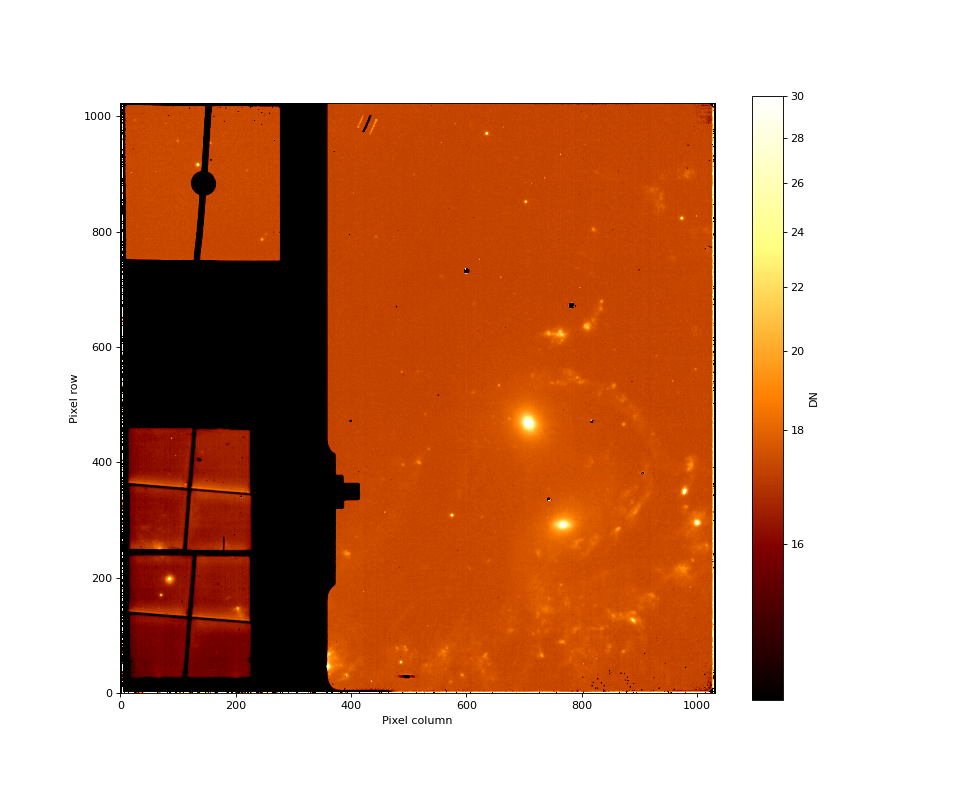

In [46]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

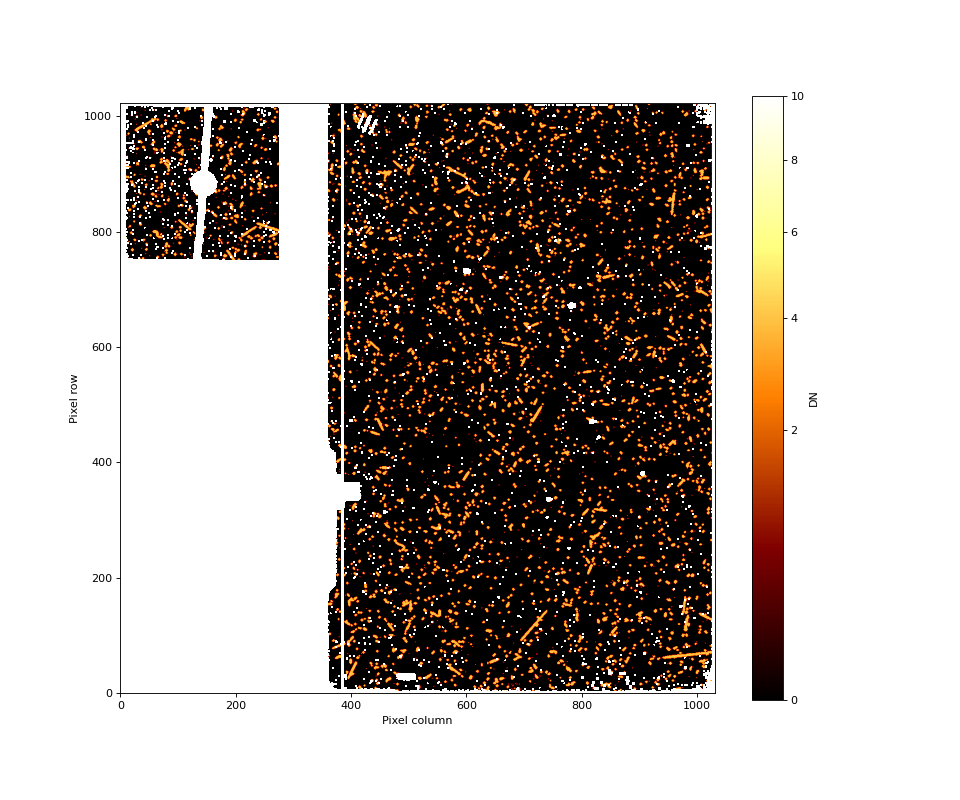

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

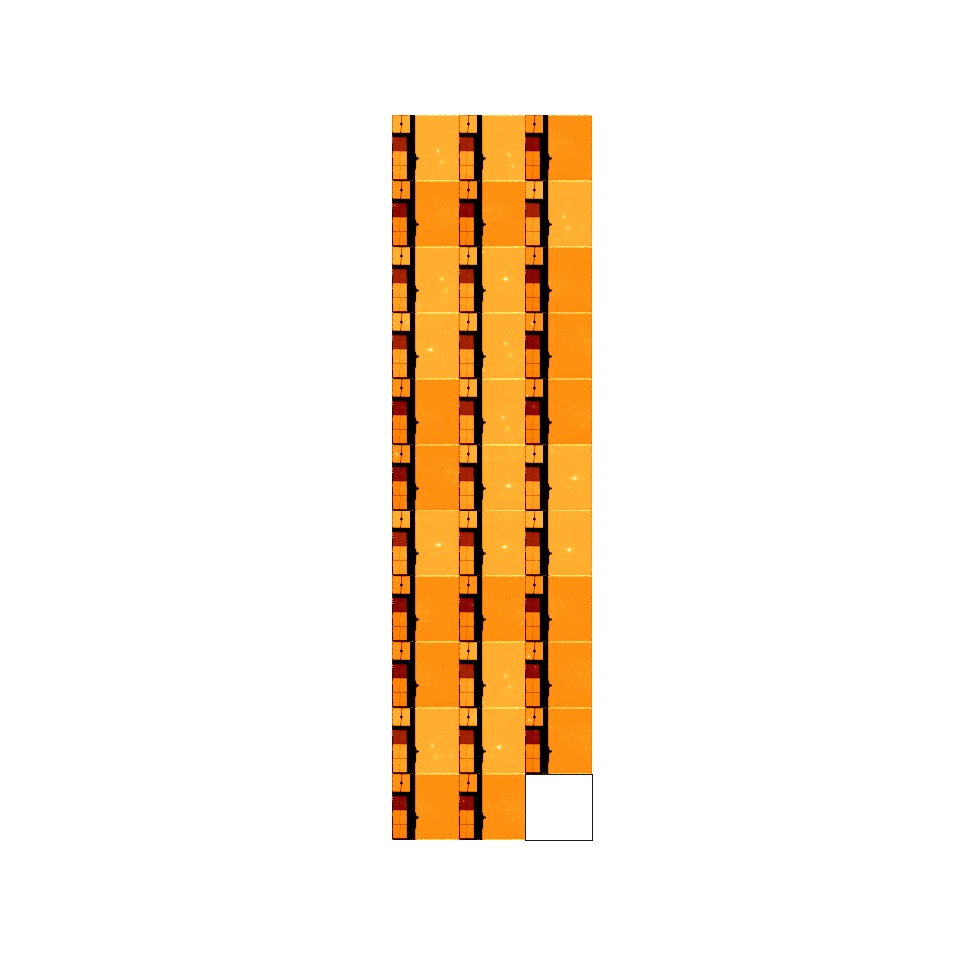

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}6001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}6002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1000W/stage2/jw02732002002_02103_00001_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002002_02103_00006_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002002_02103_00003_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732006002_02103_00002_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002002_02103_00008_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002002_02103_00005_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002002_02103_00002_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732006002_02103_00005_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732006001_02103_00001_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002001_02103_00003_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002002_02103_00007_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732006002_02103_00001_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732002001_02103_00008_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02732006002_02103_00007_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-08-03 14:38:57,655 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-03 14:38:57,656 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-03 14:38:57,657 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-08-03 14:38:57,658 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-08-03 14:38:58,282 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:38:58,284 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-03 14:39:05,862 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-03 14:39:05,863 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.9, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-08-03 14:41:22,290 - stpipe.Image3Pipeline.skymatch - INFO -  
2022-08-03 14:41:22,412 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch done
2022-08-03 14:41:22,890 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<ModelContainer>,).
2022-08-03 14:41:22,891 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'crf', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}
2022-08-03 14:41:22,910 - s

2022-08-03 14:42:36,601 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1978, 2385)
2022-08-03 14:42:37,508 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1978, 2385)
2022-08-03 14:42:38,391 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1978, 2385)
2022-08-03 14:42:38,432 - stpipe.Image3Pipeline.outlier_detection - INFO - Flagging outliers
2022-08-03 14:42:38,515 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2477 (0.23%)
2022-08-03 14:42:38,595 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2219 (0.21%)
2022-08-03 14:42:38,677 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2237 (0.21%)
2022-08-03 14:42:38,759 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2463 (0.23%)
2022-08-03 14:42:38,838 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels

2022-08-03 14:43:06,872 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732002001_02103_00006_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 14:43:07,884 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732002001_02103_00005_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 14:43:08,892 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006001_02103_00003_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 14:43:09,877 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732002001_02103_00007_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 14:43:10,847 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006001_02103_00007_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 14:43:11,866 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00008_mirimage_fixed_wcs_a3001_crf.fits
2022

2022-08-03 14:44:07,648 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:08,608 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:09,602 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:10,571 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:11,541 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:12,487 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:13,489 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:14,433 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:15,421 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2405)
2022-08-03 14:44:16,428 - stpipe.Image3Pipelin

2022-08-03 14:45:22,792 - stpipe.Image3Pipeline.resample - INFO - Saved model in ./F1000W/stage3/miri_F1000W_stage3_asn_i2d.fits
2022-08-03 14:45:22,792 - stpipe.Image3Pipeline.resample - INFO - Step resample done
2022-08-03 14:45:23,155 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(1994, 2405) from miri_F1000W_stage3_asn_i2d.fits>,).
2022-08-03 14:45:23,157 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 1000, 'kernel_fwhm': 2.0, 'snr_threshold': 5, 'npixels': 25, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}
2022-08-03 14:45:23,175 - stpipe.Image3Pip

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

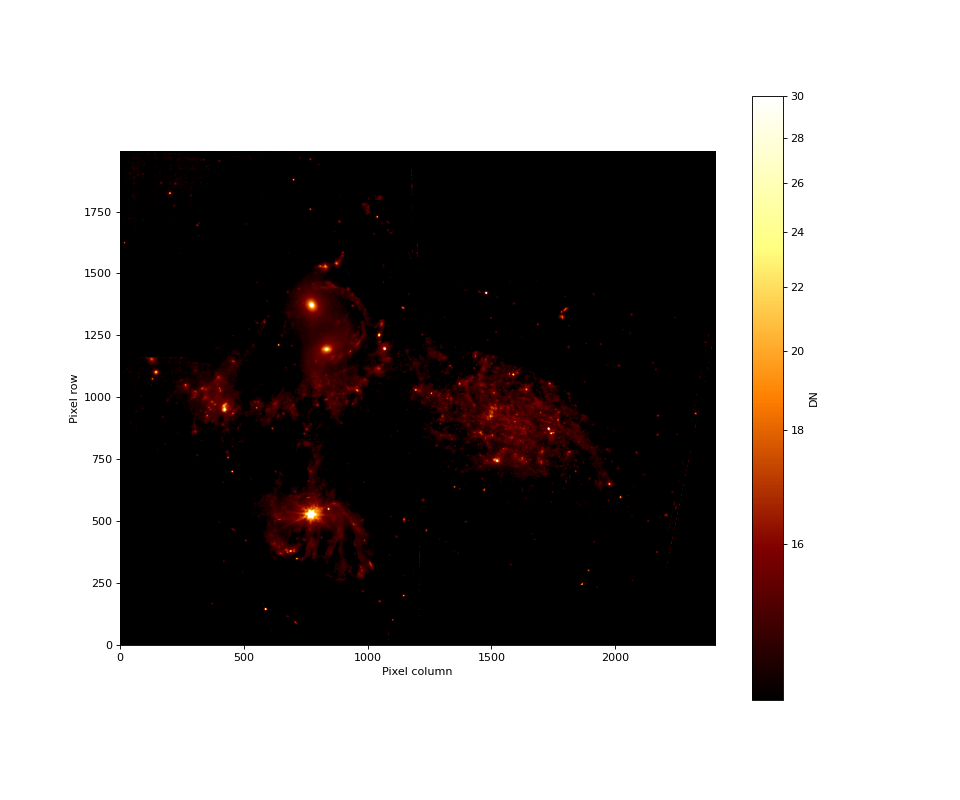

In [47]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

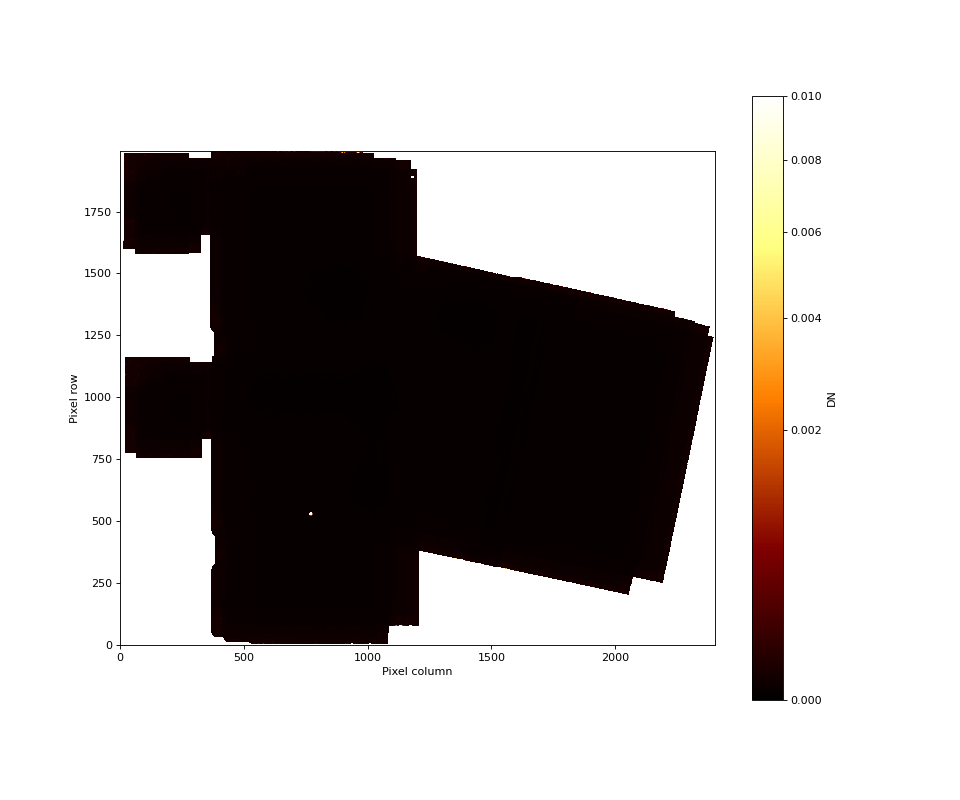

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

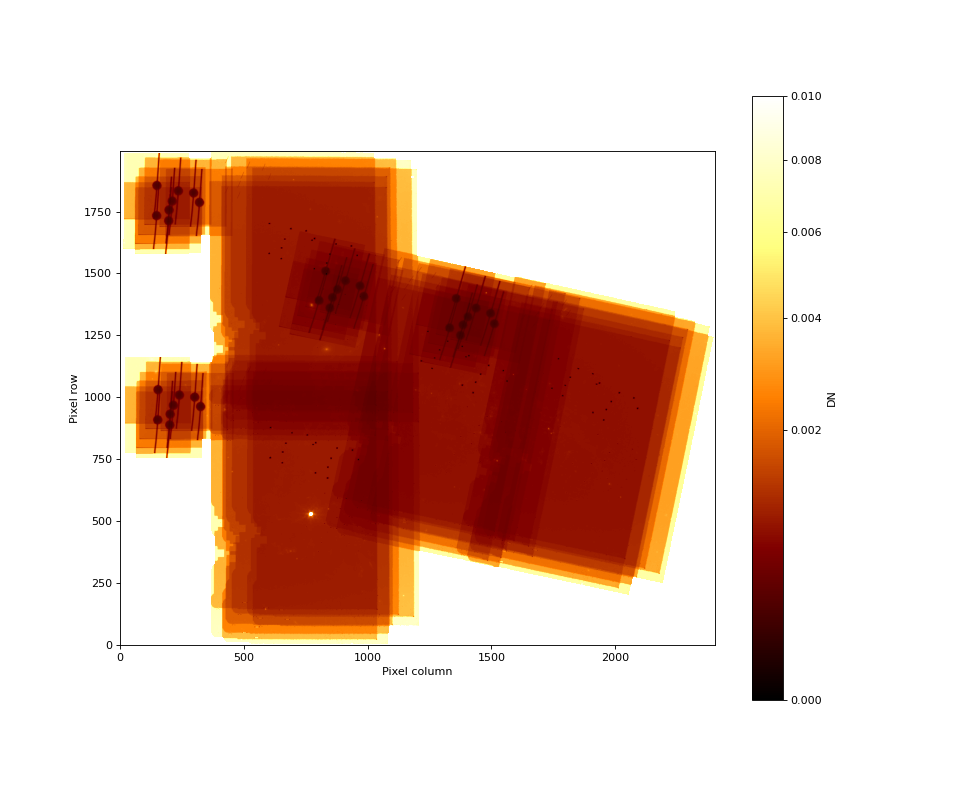

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

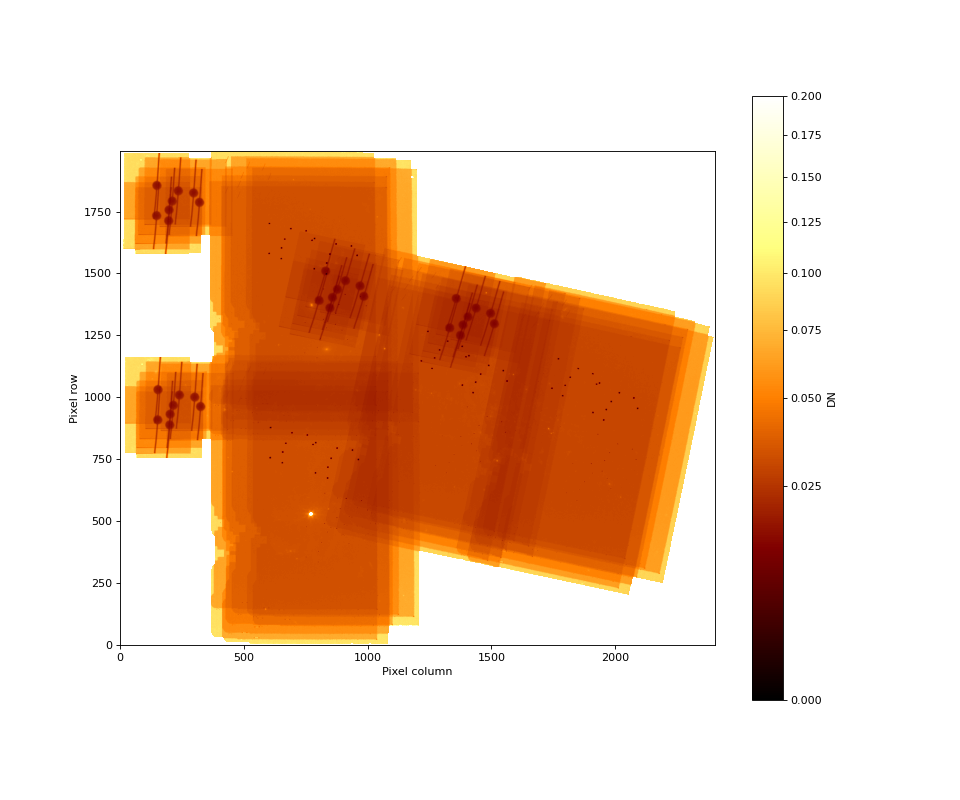

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

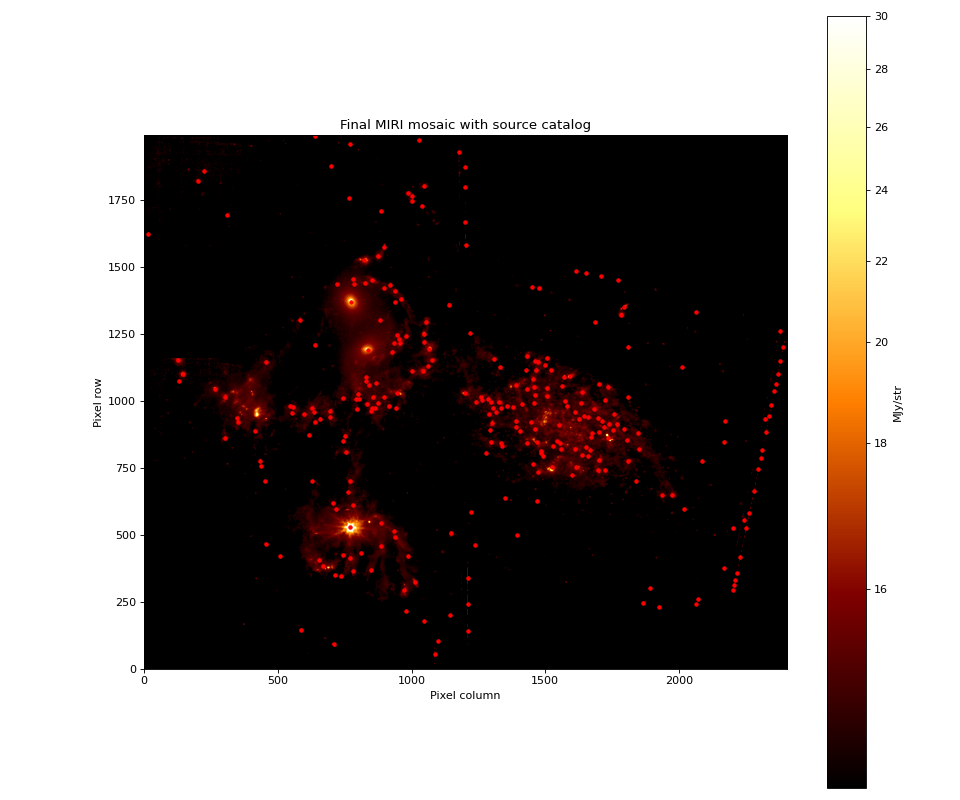

In [48]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)